In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
np.random.seed(245)
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import keras
from keras.models import Model
from keras.layers import *
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_car = pd.read_csv("/content/drive/My Drive/car purchasing.csv",encoding='latin-1')

In [ ]:
df_car.head(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
# @title Default title text
df_car.drop(columns =['customer name','customer e-mail',	'country',	'gender'])

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
df_car.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [ ]:
df_car.shape

(500, 9)

In [ ]:
df_car.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [ ]:
df_car.drop(columns =['customer name','customer e-mail',	'country',	'gender'], inplace =True)

In [ ]:
df_car.columns

Index(['age', 'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [ ]:
df_car.shape

(500, 5)

In [ ]:
col_list = list(df_car.columns)
for col in col_list:
    if df_car[col].dtypes=='object':
        #print('ob')
        df_car[col] = df_car[col].fillna(df_car[col].mode()[0])
    else:
        #print('num')
        df_car[col] = df_car[col].fillna(df_car[col].mean())

In [ ]:
X = df_car.drop('car purchase amount', axis=1)
y = df_car['car purchase amount']

In [ ]:
df_car.shape

(500, 5)

In [ ]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
print(X)

[[0.4370344  0.53515116 0.57836085 0.22342985]
 [0.41741247 0.58308616 0.476028   0.52140195]
 [0.46305795 0.42248189 0.55579674 0.63108896]
 ...
 [0.67886994 0.61110973 0.52822145 0.75972584]
 [0.78321017 0.37264988 0.69914746 0.3243129 ]
 [0.53462305 0.51713347 0.46690159 0.45198622]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 4)
(400, 1)
(100, 4)
(100, 1)


In [ ]:
model= models.Sequential()
model.add(Dense(10, activation = 'relu', input_dim=4))
model.add(Dropout(0.15))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation = 'linear'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                50        
                                                                 
 dropout_12 (Dropout)        (None, 10)                0         
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dropout_13 (Dropout)        (None, 10)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])


In [ ]:
!pip install livelossplot

In [ ]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()
%matplotlib inline

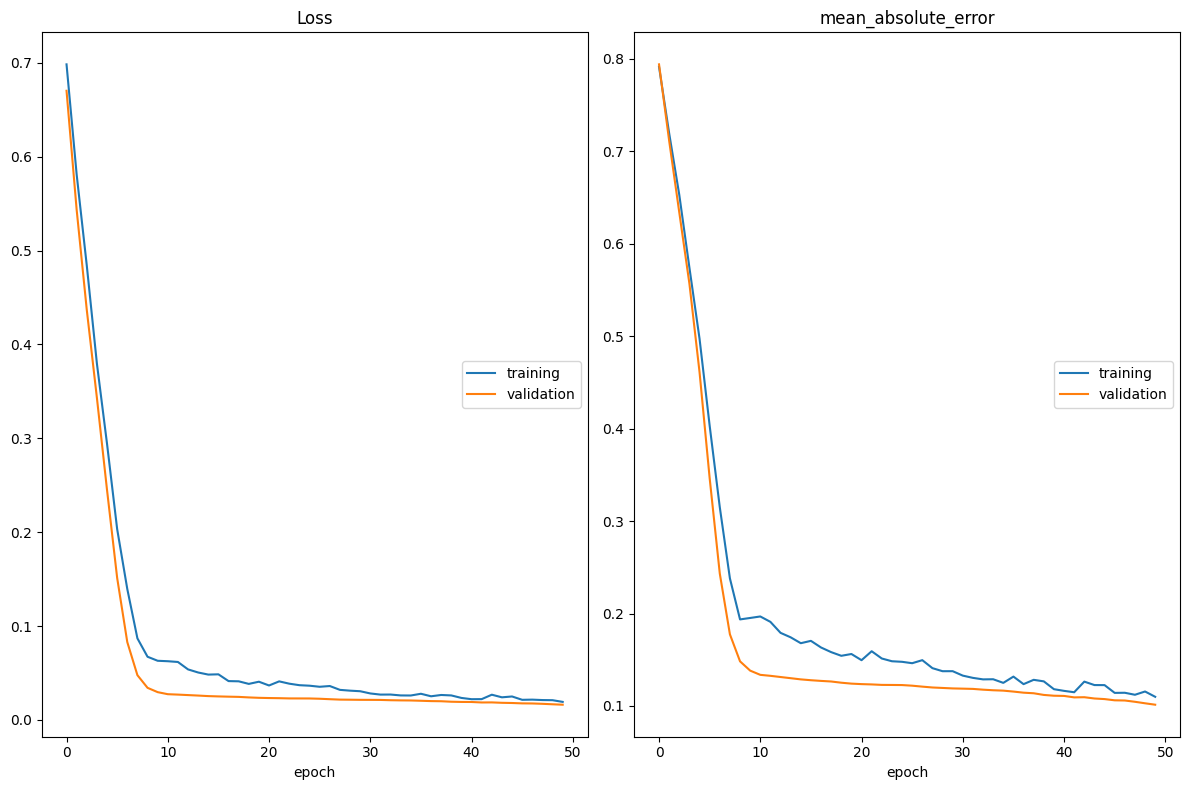

Loss
	training         	 (min:    0.019, max:    0.698, cur:    0.019)
	validation       	 (min:    0.016, max:    0.670, cur:    0.016)
mean_absolute_error
	training         	 (min:    0.110, max:    0.792, cur:    0.110)
	validation       	 (min:    0.101, max:    0.794, cur:    0.101)
13/13 [==============================] - 1s 59ms/step - loss: 0.0192 - mean_absolute_error: 0.1099 - val_loss: 0.0162 - val_mean_absolute_error: 0.1014
Test loss: 0.01623254269361496
Test accuracy: 0.10137126594781876


In [ ]:
history = model.fit(X_train, y_train,
          epochs =50,
          callbacks = [plot_losses],
          verbose =1,
          validation_data =(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
y_pred = model.predict(X_test)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[0.4575055 ],
       [0.4575628 ],
       [0.45876542],
       [0.51478577],
       [0.48371622],
       [0.49934664],
       [0.5627266 ],
       [0.55078834],
       [0.45691338],
       [0.48297572],
       [0.505956  ],
       [0.5143177 ],
       [0.5870682 ],
       [0.58826005],
       [0.4496769 ],
       [0.4480898 ],
       [0.5284674 ],
       [0.50350165],
       [0.46254352],
       [0.42694125],
       [0.49047413],
       [0.48684192],
       [0.50663924],
       [0.46782908],
       [0.57763207],
       [0.49929002],
       [0.47248882],
       [0.45613357],
       [0.54245245],
       [0.53268427],
       [0.54022914],
       [0.52489305],
       [0.52853656],
       [0.49167663],
       [0.5213202 ],
       [0.53175926],
       [0.45563385],
       [0.55306613],
       [0.46239367],
       [0.47216216],
       [0.5021119 ],
       [0.4503176 ],
       [0.45468345],
       [0.4632868 ],
       [0.47188172],
       [0.51755375],
       [0.47577003],
       [0.508

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )


R2 Score= 0.32060842409260515
